In [ ]:
#Distinguere le categorie dataset, come?
#Nomi Features
#Numero o tipo features
#Metadati!
#Metodi di raccolta


In [1]:
#CLUSTERING 
#Test con 28 dataset
#Nomedataset$categoria!

#Carico il json

import json
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

# Carica i dati dal JSON
with open('export.json', 'r') as file:
    data = json.load(file)
   

In [2]:
#NORMALIZZAZIONE

import re
#from nltk.corpus import stopwords
import nltk

#stop_words = set(stopwords.words('english'))

#funzione che normalizza features: tutto lower + rimuove simboli strani
def normalize_feature(feature):
    # Trasformazione in minuscolo
    new_feature = feature.lower()
    # Rimozione di simboli strani e sostituzione degli spazi con underscore
    #new_feature = re.sub(r'[^a-zA-Z0-9\s]', '', new_feature).replace(' ', '_')
    new_feature = re.sub(r'[^a-zA-Z0-9\s_]', '', new_feature)
    return new_feature
       

In [3]:
#LIMITAZIONI 
limit_len_s = 200 #lunghezza stringhe
limit_n_features = 20 #numero features

#il primo elemento nella lista è la categoria e viene tolta, le altre sono features
#features to string
set_features = []
categories = []

exclude = ['age', 'gender', 'sex', 'id']

for dataset in data:
    s = ""
    first_element_added = False  # per tenere traccia del primo elemento
    count = 0  # per contare le features

    for el in data[dataset]:
        el = normalize_feature(el)
        #print(type(el))
        if not first_element_added:
            categories.append(el)  # Aggiungi il primo elemento a categories
            first_element_added = True
        else:
            # Concatena gli elementi successivi fino a raggiungere 200 caratteri
            if len(s + el + " ") <= limit_len_s:
                if el not in exclude:
                    s = s + el + " "  # Concatena gli elementi successivi
            else:
                break  # Esci dal loop se la lunghezza supera i 200 caratteri

        count += 1
        if count >= limit_n_features:  # Limite delle prime 20 features
            break  # Esci dal loop dopo la ventesima feature


    set_features.append(s)

    
set_features[0:5]

['ethnicgroup parenteduc lunchtype testprep parentmaritalstatus practicesport isfirstchild nrsiblings transportmeans wklystudyhours mathscore readingscore writingscore ',
 'countries and areas latitude  longitude oosr_pre0primary_age_male oosr_pre0primary_age_female oosr_primary_age_male oosr_primary_age_female oosr_lower_secondary_age_male ',
 'index location indicator subject time value ',
 'student_age high_school_type scholarship additional_work sports_activity transportation weekly_study_hours attendance reading notes listening_in_class project_work grade ',
 'student_id school address_type family_size parent_status mother_education father_education mother_job father_job school_choice_reason guardian travel_time study_time class_failures school_support ']

In [4]:
#quante e quali categorie?

print(set(categories))

{'education', 'sport', 'music', 'healthcare'}


In [5]:
#!! costruisco un dizionario con ciascuna stringa come chiave associata alla categoria. 
#!!costoso, da valutare se fare in un colpo solo prima
# Verifica se le liste hanno la stessa lunghezza
if len(categories) == len(set_features):
    dictionary = {}

    for i in range(len(categories)):
        stringa = set_features[i]
        categoria = categories[i]

        if stringa not in dictionary:
            dictionary[stringa] = categoria

    #print(dictionary)
else:
    print("Le liste non hanno la stessa lunghezza")


In [96]:
#lunghezze troppo variabili
for s in set_features:
    #print(len(s))

IndentationError: expected an indented block (216546524.py, line 3)

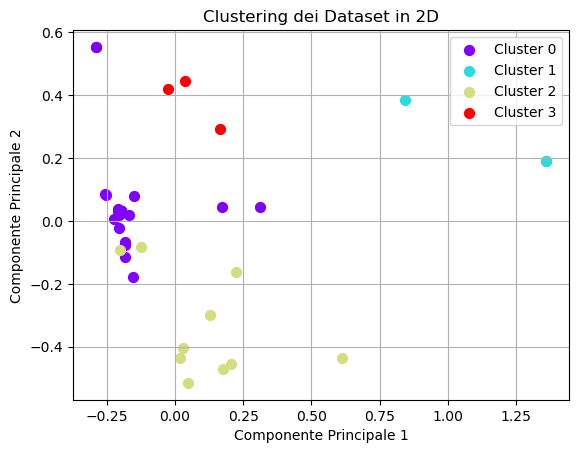

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Tokenizzazione delle stringhe e creazione di rappresentazioni vettoriali
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(set_features)

# Calcolo della similarità tra dataset basata sulla similarità del coseno
similarity_matrix = cosine_similarity(X)

# Applicazione di DBSCAN per raggruppare i dataset
#eps = 1.2  # Distanza massima tra due campioni per appartenere allo stesso cluster
#min_samples = 2  # Numero minimo di campioni in un vicinato per formare un cluster
#dbscan = DBSCAN(eps=eps, min_samples=min_samples)
#clusters = dbscan.fit_predict(similarity_matrix)

# Applicazione di K-Means per raggruppare i dataset
num_clusters = len(set(categories))  # Numero di cluster desiderati = numero categorie
kmeans = KMeans(n_clusters=num_clusters)
clusters = kmeans.fit_predict(similarity_matrix)


# Riduzione dimensionale con PCA a 2 componenti
pca = PCA(n_components=2)
X_pca = pca.fit_transform(similarity_matrix)

# Plot in 2D dei cluster
unique_clusters = np.unique(clusters)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_clusters)))

for cluster_label, color in zip(unique_clusters, colors):
    cluster_mask = (clusters == cluster_label)
    plt.scatter(
        X_pca[cluster_mask, 0],
        X_pca[cluster_mask, 1],
        label=f'Cluster {cluster_label}',
        color=color,
        s=50
    )

# Impostazioni del plot
plt.title('Clustering dei Dataset in 2D')
plt.xlabel('Componente Principale 1')
plt.ylabel('Componente Principale 2')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# Organizzazione dei dataset per cluster
dataset_per_cluster = {}
for i, cluster_label in enumerate(clusters):
    if cluster_label not in dataset_per_cluster:
        dataset_per_cluster[cluster_label] = []
    dataset_per_cluster[cluster_label].append(set_features[i])

# Visualizzazione dei dataset per ciascun cluster
for cluster_label, datasets in dataset_per_cluster.items():
    print(f"Cluster {cluster_label}:")
    for dataset in datasets:
        print(f"categoria: {dictionary[dataset]}")
        print(f"features: {dataset}")
        print()
    print("-----")

Cluster 0:
categoria: education
features: ethnicgroup parenteduc lunchtype testprep parentmaritalstatus practicesport isfirstchild nrsiblings transportmeans wklystudyhours mathscore readingscore writingscore 

categoria: education
features: countries and areas latitude  longitude oosr_pre0primary_age_male oosr_pre0primary_age_female oosr_primary_age_male oosr_primary_age_female oosr_lower_secondary_age_male 

categoria: education
features: index location indicator subject time value 

categoria: education
features: student_age high_school_type scholarship additional_work sports_activity transportation weekly_study_hours attendance reading notes listening_in_class project_work grade 

categoria: education
features: student_id school address_type family_size parent_status mother_education father_education mother_job father_job school_choice_reason guardian travel_time study_time class_failures school_support 

categoria: healthcare
features: patient_id protein1 protein2 protein3 protein4

In [7]:
#for dataset in dataset_per_cluster[0]:
#    print(f"categoria: {dictionary[dataset]}")
#    print(f"features: {dataset}")
#    print()

In [10]:
# Visualizzazione solo categorie
for cluster_label, datasets in dataset_per_cluster.items():
    print(f"Cluster {cluster_label}:")
    for dataset in datasets:
        print(f"{dictionary[dataset]}", end=' ')
    print()

Cluster 0:
education education education education education healthcare healthcare music healthcare healthcare healthcare healthcare healthcare healthcare healthcare music music music music music music music music sport sport sport sport sport 
Cluster 2:
healthcare healthcare healthcare music sport sport sport sport sport sport 
Cluster 3:
healthcare healthcare music 
Cluster 1:
sport sport sport 


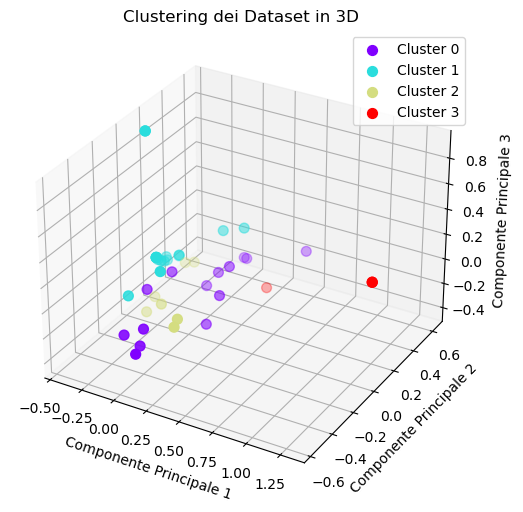

In [100]:
# Riduzione dimensionale con PCA a 3 componenti
pca = PCA(n_components=3)
X_pca = pca.fit_transform(similarity_matrix)

# Plot in 3D dei cluster
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Estrai punti per ciascun cluster
unique_clusters = np.unique(clusters)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_clusters)))

for cluster_label, color in zip(unique_clusters, colors):
    cluster_mask = (clusters == cluster_label)
    ax.scatter(
        X_pca[cluster_mask, 0],
        X_pca[cluster_mask, 1],
        X_pca[cluster_mask, 2],
        label=f'Cluster {cluster_label}',
        color=color,
        s=50
    )

# Impostazioni del plot
ax.set_title('Clustering dei Dataset in 3D')
ax.set_xlabel('Componente Principale 1')
ax.set_ylabel('Componente Principale 2')
ax.set_zlabel('Componente Principale 3')
ax.legend()
plt.show()

In [39]:
#WORD2VEC


from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import gensim.downloader as api

model = api.load("word2vec-google-news-300")
